In [1]:
%pylab inline
from PIL import Image
from scipy.ndimage.interpolation import zoom
from astropy.convolution import convolve, Gaussian1DKernel

Populating the interactive namespace from numpy and matplotlib


In [2]:
pixelPitch = 1/(sqrt(1600**2+900**2)/360) #for my laptop screen in mm/pixel
print(pixelPitch)

0.19610449585302359


# Conventional DoF Blur 
Cylindrical blur, no smoothing

blurRadius = 8.0px


(10, 80)

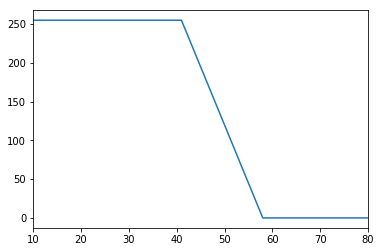

In [6]:
pixR = zeros((100))
pixG = zeros((100))
pixB = zeros((100))
for k in range(100):
    if k < 50:
        pixR[k] = 255
        pixG[k] = 255
        pixB[k] = 255

# Typical DoF blur:
plane = .5 #meters
pupil = 4e-3 #meters
frag = .294 #meter
blur = pupil / frag * abs(plane - frag)*1000 # in mm
blurPixel = ceil(blur / (2*pixelPitch))
print("blurRadius = " + str(blurPixel) + "px")

pixClear = pixR
pixBlur = zeros(100)

for k in range(100):
    if k > blurPixel:
        if k < 100-blurPixel:
            s = 0
            for j in range(-int(blurPixel),int(blurPixel)+1):
                s = s + pixClear[k+j]
            pixBlur[k] = s/(2*int(blurPixel)+1)

plot(range(100), pixBlur)
xlim([10,80])

In [9]:
rgbArrayBlur = np.zeros((1,100,3), 'uint8')
rgbArrayBlur[..., 0] = pixBlur
rgbArrayBlur[..., 1] = pixBlur
rgbArrayBlur[..., 2] = pixBlur
zoom_factor = [1,10,1]
zoomArray = zoom(rgbArrayBlur, zoom_factor)
zoomArray.astype('uint8')
Image.fromarray(zoomArray)

# ChromaBlur - forward algorithm, no smoothing
-1D defocus

defocusR = 
0.548951110281769
defocusB = 
-0.9542903772785076
fragDist = 1
distR = 0.6455981685684646
distB = 21.877231542534837
blurRPixel 3.0
blurGPixel 6.0
blurBPixel 10.0


Text(0,0.5,'Saturation')

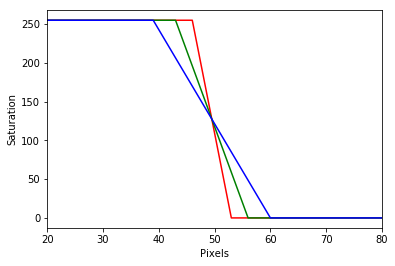

In [10]:
l = 100 #length of array - white to black

#construct in focus array
pixR = zeros((l))
pixG = zeros((l))
pixB = zeros((l))
for k in range(l):
    if k < l/2:
        pixR[k] = 255
        pixG[k] = 255
        pixB[k] = 255

# Calculate the relative defocus for color channels
r = 750 # nm
b = 450 # nm
# The defocus gives the focal length of the eye for
# the red and the blue channels
defocusR = 1.731 - 633.46/(r-214.10) # relative diopters
defocusB = 1.731 - 633.46/(b-214.10) # relative diopters
print("defocusR = ")
print(defocusR)
print("defocusB = ")
print(defocusB)

# define defocus parameters
plane = .5 #meters
pupil = 4e-3 #meters
frag = 1 #meter
print("fragDist = " + str(frag))

distR = 1/(1/frag + defocusR)
distB = 1/(1/frag + defocusB)
print("distR = "+str(distR))
print("distB = "+str(distB))

# Compute circle of confusion:
ccR = ceil(1000*pupil / distR * abs(plane-distR)/(2*pixelPitch))
ccB = ceil(1000*pupil / distB * abs(plane-distB)/(2*pixelPitch))
ccG = ceil(1000*pupil / frag * abs(plane - frag)/(2*pixelPitch))

print("blurRPixel "+ str(ccR))
print("blurGPixel " + str(ccG))
print("blurBPixel " + str(ccB))

pixRClear = pixR
pixGClear = pixG
pixBClear = pixB
pixRBlur = zeros(l)
pixGBlur = zeros(l)
pixBBlur = zeros(l)

# Perform blur
for k in range(l):
    if k > max(ccR,ccB,ccG):
        if k < l-max(ccR,ccB,ccG):
            sR = 0
            ctR = 0
            for j in range(-int(ccR),int(ccR+1)):
                sR += pixRClear[k+j]
                ctR += 1
            sG = 0
            ctG = 0
            for j in range(-int(ccG),int(ccG+1)):
                sG += pixGClear[k+j]
                ctG += 1
            sB = 0
            ctB = 0
            for j in range(-int(ccB),int(ccB+1)):
                sB += pixBClear[k+j]
                ctB += 1
            pixRBlur[k] = sR/ctR
            pixGBlur[k] = sG/ctG
            pixBBlur[k] = sB/ctB
            
plot(range(l),pixRBlur,'r', range(l),pixGBlur, 'g', range(l),pixBBlur, 'b')
xlim(20,80)
xlabel('Pixels')
ylabel('Saturation')

In [11]:
rgbArrayBlur = np.zeros((1,100,3), 'uint8')
rgbArrayBlur[..., 0] = pixRBlur
rgbArrayBlur[..., 1] = pixGBlur
rgbArrayBlur[..., 2] = pixBBlur
zoom_factor = [1,10,1]
zoomArray = zoom(rgbArrayBlur, zoom_factor)
zoomArray.astype('uint8')
Image.fromarray(zoomArray)

# ChromaBlur Foward Algorithm + Gaussian Smoothing
-1D defocus

defocusR = 
0.548951110281769
defocusB = 
-0.9542903772785076
fragDist = 1
distR = 0.6455981685684646
distB = 21.877231542534837
blurRPixel 3.0
blurGPixel 6.0
blurBPixel 10.0


Text(0,0.5,'Saturation')

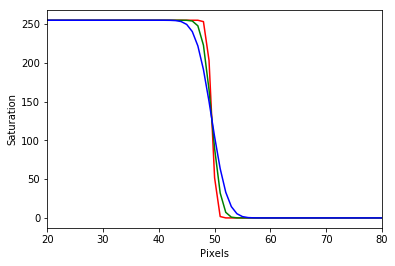

In [12]:
l = 100 #length of array - white to black

#construct in focus array
pixR = zeros((l))
pixG = zeros((l))
pixB = zeros((l))
for k in range(l):
    if k < l/2:
        pixR[k] = 255
        pixG[k] = 255
        pixB[k] = 255

# Calculate the relative defocus for color channels
r = 750 # nm
b = 450 # nm
# The defocus gives the focal length of the eye for
# the red and the blue channels
defocusR = 1.731 - 633.46/(r-214.10) # relative diopters
defocusB = 1.731 - 633.46/(b-214.10) # relative diopters
print("defocusR = ")
print(defocusR)
print("defocusB = ")
print(defocusB)

# define defocus parameters
plane = .5 #meters
pupil = 4e-3 #meters
frag = 1 #meter
print("fragDist = " + str(frag))

distR = 1/(1/frag + defocusR)
distB = 1/(1/frag + defocusB)
print("distR = "+str(distR))
print("distB = "+str(distB))

# Compute circle of confusion:
ccR = ceil(1000*pupil / distR * abs(plane-distR)/(2*pixelPitch))
ccB = ceil(1000*pupil / distB * abs(plane-distB)/(2*pixelPitch))
ccG = ceil(1000*pupil / frag * abs(plane - frag)/(2*pixelPitch))

print("blurRPixel "+ str(ccR))
print("blurGPixel " + str(ccG))
print("blurBPixel " + str(ccB))

pixRClear = pixR
pixGClear = pixG
pixBClear = pixB
pixRBlur = zeros(l)
pixGBlur = zeros(l)
pixBBlur = zeros(l)

# Create 1D Gaussian Kernel for each color
t = np.linspace(-10, 10, (2*int(ccB)+1))
kernelB = np.exp(-0.1*t**2)
kernelB /= np.trapz(kernelB) # normalize the integral to 1

t = np.linspace(-10, 10, (2*int(ccR)+1))
kernelR = np.exp(-0.1*t**2)
kernelR /= np.trapz(kernelR) # normalize the integral to 1

t = np.linspace(-10, 10, (2*int(ccG)+1))
kernelG = np.exp(-0.1*t**2)
kernelG /= np.trapz(kernelG) # normalize the integral to 1

for k in range(l):
    if k > max(ccR,ccB,ccG):
        if k < l-max(ccR,ccB,ccG):
            sR = 0
            for j in range(-int(ccR),int(ccR+1)):
                sR += pixRClear[k+j]*kernelR[int(ccR)+j]
            sG = 0
            for j in range(-int(ccG),int(ccG+1)):
                sG += pixGClear[k+j]*kernelG[int(ccG)+j]
            sB = 0
            for j in range(-int(ccB),int(ccB+1)):
                sB += pixBClear[k+j]*kernelB[int(ccB)+j]
            pixRBlur[k] = sR
            pixGBlur[k] = sG
            pixBBlur[k] = sB
            
plot(range(l),pixRBlur,'r', range(l),pixGBlur, 'g', range(l),pixBBlur, 'b')
xlim(20,80)
xlabel('Pixels')
ylabel('Saturation')

In [13]:
rgbArrayBlur = np.zeros((1,100,3), 'uint8')
rgbArrayBlur[..., 0] = pixRBlur
rgbArrayBlur[..., 1] = pixGBlur
rgbArrayBlur[..., 2] = pixBBlur
zoom_factor = [1,10,1]
zoomArray = zoom(rgbArrayBlur, zoom_factor)
zoomArray.astype('uint8')
Image.fromarray(zoomArray)

# ChromaBlur forward + smoothing
+1D defocus

defocusR = 
0.548951110281769
defocusB = 
-0.9542903772785076
fragDist = 0.294
distR = 0.2531445838864351
distB = 0.4086519518362688
blurRPixel 10.0
blurGPixel 8.0
blurBPixel 3.0


(20, 80)

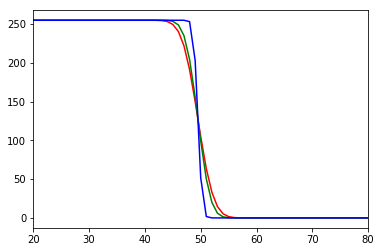

In [14]:
l = 100 #length of array - white to black

#construct in focus array
pixR = zeros((l))
pixG = zeros((l))
pixB = zeros((l))
for k in range(l):
    if k < l/2:
        pixR[k] = 255
        pixG[k] = 255
        pixB[k] = 255

# Calculate the relative defocus for color channels
r = 750 # nm
b = 450 # nm
# The defocus gives the focal length of the eye for
# the red and the blue channels
defocusR = 1.731 - 633.46/(r-214.10) # relative diopters
defocusB = 1.731 - 633.46/(b-214.10) # relative diopters
print("defocusR = ")
print(defocusR)
print("defocusB = ")
print(defocusB)

# define defocus parameters
plane = .5 #meters
pupil = 4e-3 #meters
frag = .294 #meter
print("fragDist = " + str(frag))

distR = 1/(1/frag + defocusR)
distB = 1/(1/frag + defocusB)
print("distR = "+str(distR))
print("distB = "+str(distB))

# Compute circle of confusion:
ccR = ceil(1000*pupil / distR * abs(plane-distR)/(2*pixelPitch))
ccB = ceil(1000*pupil / distB * abs(plane-distB)/(2*pixelPitch))
ccG = ceil(1000*pupil / frag * abs(plane - frag)/(2*pixelPitch))

print("blurRPixel "+ str(ccR))
print("blurGPixel " + str(ccG))
print("blurBPixel " + str(ccB))

pixRClear = pixR
pixGClear = pixG
pixBClear = pixB
pixRBlur = zeros(l)
pixGBlur = zeros(l)
pixBBlur = zeros(l)

# Create 1D Gaussian Kernel for each color
t = np.linspace(-10, 10, (2*int(ccB)+1))
kernelB = np.exp(-0.1*t**2)
kernelB /= np.trapz(kernelB) # normalize the integral to 1

t = np.linspace(-10, 10, (2*int(ccR)+1))
kernelR = np.exp(-0.1*t**2)
kernelR /= np.trapz(kernelR) # normalize the integral to 1

t = np.linspace(-10, 10, (2*int(ccG)+1))
kernelG = np.exp(-0.1*t**2)
kernelG /= np.trapz(kernelG) # normalize the integral to 1

for k in range(l):
    if k > max(ccR,ccB,ccG):
        if k < l-max(ccR,ccB,ccG):
            sR = 0
            for j in range(-int(ccR),int(ccR+1)):
                sR += pixRClear[k+j]*kernelR[int(ccR)+j]
            sG = 0
            for j in range(-int(ccG),int(ccG+1)):
                sG += pixGClear[k+j]*kernelG[int(ccG)+j]
            sB = 0
            for j in range(-int(ccB),int(ccB+1)):
                sB += pixBClear[k+j]*kernelB[int(ccB)+j]
            pixRBlur[k] = sR
            pixGBlur[k] = sG
            pixBBlur[k] = sB
            
plot(range(l),pixRBlur,'r', range(l),pixGBlur, 'g', range(l),pixBBlur, 'b')
xlim(20,80)